# Assignment
In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

- Load the dataset from the Thinkful's database. Here's the credentials you can use to connect to the database:
        postgres_user = 'dsbc_student'
        postgres_pw = '7*.8G9QH21'
        postgres_host = '142.93.121.174'
        postgres_port = '5432'
        postgres_db = 'heartdisease'
- The dataset needs some preprocessing. So, apply the following code before working with the dataset:
        # Define the features and the outcome
        X = heartdisease_df.iloc[:, :13]
        y = heartdisease_df.iloc[:, 13]

        # Replace missing values (marked by ?) with a 0
        X = X.replace(to_replace='?', value=0)

        # Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
        y = np.where(y > 0, 0, 1)
        
Here, X will be your features and in y we hold the labels. If y is equal to 1, then it indicates that the corresponding patient has heart disease and if y is equal to 0, then the patient doesn't have heart disease.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.

1. Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?
2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heart_disease = engine.execute('SELECT * FROM heartdisease').fetchall()
engine.dispose()

In [4]:
heartdisease_df = pd.DataFrame(heart_disease)
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]
X = X.replace(to_replace='?', value=0)
y = np.where(y > 0, 0, 1)

# #1

In [5]:
scaler = StandardScaler()

In [6]:
X_std = scaler.fit_transform(X)

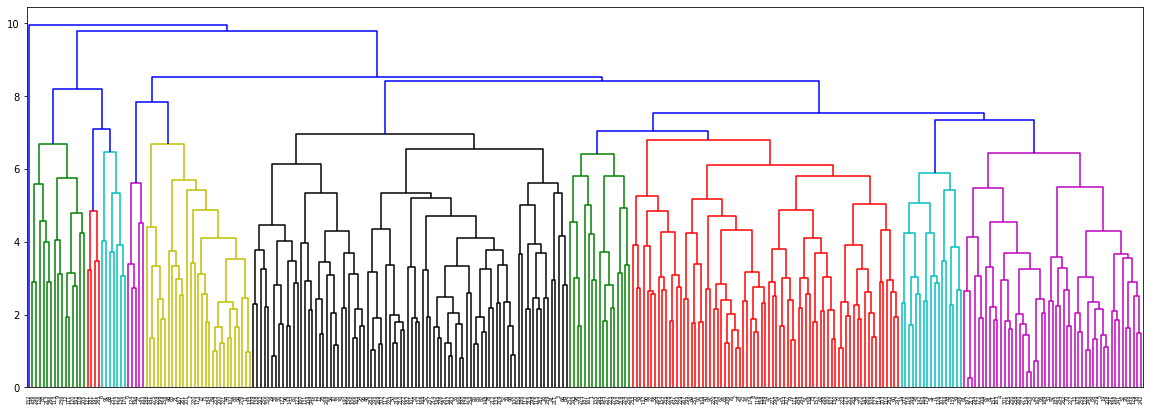

In [10]:
plt.figure(figsize=(20,7))
dendrogram(linkage(X_std, method='complete'))
plt.show()

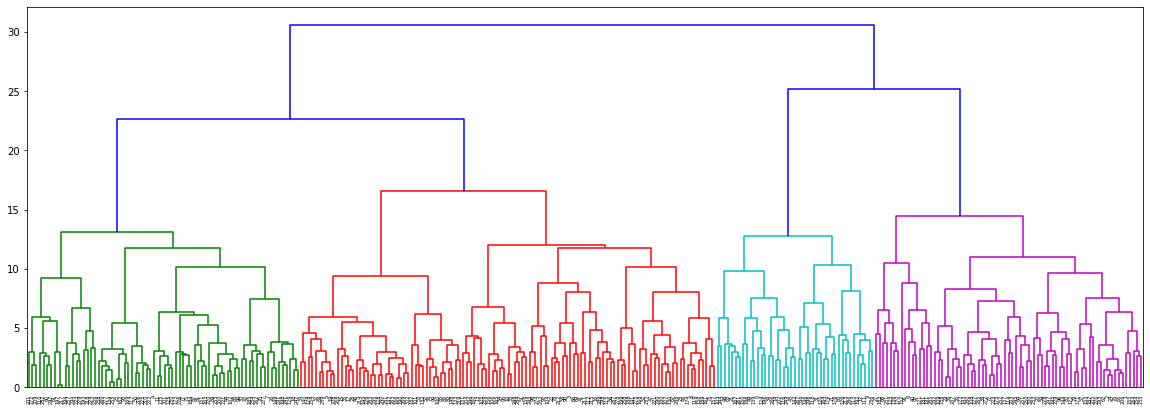

In [11]:
plt.figure(figsize=(20,7))
dendrogram(linkage(X_std, method='ward'))
plt.show()

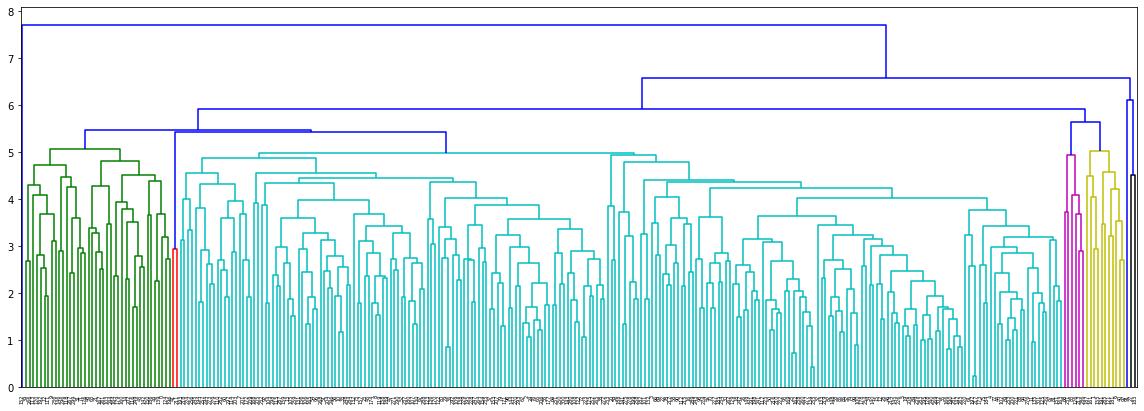

In [12]:
plt.figure(figsize=(20,7))
dendrogram(linkage(X_std, method='average'))
plt.show()

Complete or Ward look the most reasonable in this case, but I'm not sure which one turns out to be more correct based on just looking at it.

# #2

In [13]:
pca = PCA(n_components=2)

In [14]:
X_pca = pca.fit_transform(X_std)

In [16]:
comp_cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
ward_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
avg_cluster = AgglomerativeClustering(n_clusters=2, linkage='average')

In [30]:
names = ['Complete', 'Ward', 'Average']

In [31]:
clusters = [comp_cluster, ward_cluster, avg_cluster]

In [32]:
for cluster, name in zip(clusters, names):
    preds = cluster.fit_predict(X_std)
    print(name)
    print('ARI: {}'.format(metrics.adjusted_rand_score(y, preds)))
    print('Silhouette: {}'.format(metrics.silhouette_score(X_std, preds)))
    print()

Complete
ARI: -0.0010061512759301477
Silhouette: 0.34836188921330785

Ward
ARI: 0.146129913123814
Silhouette: 0.1387197366557222

Average
ARI: -0.0010061512759301477
Silhouette: 0.34836188921330785



Oddly enough, the Ward method had the greatest ARI, meaning it was closest to the truth, but it also has the lowest Silhouette score. Indicating that maybe the silhouette isn't always the greatest way to make the comparison between clustering algorithms.

In [34]:
print('ACCURACY')
print('--------')
for cluster, name in zip(clusters, names):
    preds = cluster.fit_predict(X_std)
    print(name)
    print((preds == y).mean())

ACCURACY
--------
Complete
0.46204620462046203
Ward
0.693069306930693
Average
0.46204620462046203
